# Ejercicio con regularizadores

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000,28*28)
test_images  = test_images.astype('float32') / 255

In [ ]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 60K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:60000-1]
validation_labels = train_labels[50000:60000-1]

In [ ]:
def crea_modelo(regularizador):
  model1 = models.Sequential()
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  if regularizador == 0:
      model1.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
  elif regularizador == 1:
      model1.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l1(0.001),input_shape=(28*28,)))
  elif regularizador == 2:
      model1.add(layers.Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
  elif regularizador == 3:
      model1.add(layers.Dense(512,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(28*28,)))
  elif regularizador == 4:
      model1.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
      model1.add(layers.Dropout(0.5))
  else:
      print('ERROR. No existe esa opción')
      return model1

  model1.add(layers.Dense(10, activation='softmax'))
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model1.summary()
  return model1

In [ ]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [ ]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  historia = modelo.fit(train_images,  train_labels, epochs=30, batch_size=128, validation_data=(validation_images, validation_labels))
  return historia

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2588 - accuracy: 0.9255 - val_loss: 0.1111 - val_accuracy: 0.9694
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1045 - accuracy: 0.9693 - val_loss: 0.0700 - val_accuracy: 0.9797
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0676 - accuracy: 0.9799 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0305 - val_accuracy: 0.9916
Epoch 5/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0372 - accuracy: 0.9889 - val_loss: 0.0237 - val_accuracy: 0.9933
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0191 - val_accuracy: 0.9942
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0137 - val_accuracy: 0.9966

In [ ]:
print(historia0.history)


{'loss': [0.2588132321834564, 0.10449975728988647, 0.06762852519750595, 0.04919731989502907, 0.03723546862602234, 0.02816843055188656, 0.0213392972946167, 0.016724148765206337, 0.012378646992146969, 0.009737145155668259, 0.007519910577684641, 0.0059458124451339245, 0.004873714409768581, 0.003842805279418826, 0.0028014008421450853, 0.0023386357352137566, 0.0016891297418624163, 0.0016654256032779813, 0.0009449298377148807, 0.0008555265958420932, 0.0008683068444952369, 0.0005517080426216125, 0.00047493900638073683, 0.0003733796183951199, 0.00025779614225029945, 0.0003269159060437232, 0.0001279531861655414, 0.0001734437100822106, 0.00020147072791587561, 0.00014624725736211985], 'accuracy': [0.9255499839782715, 0.9692500233650208, 0.9799166917800903, 0.9850999712944031, 0.9889333248138428, 0.991183340549469, 0.9936833381652832, 0.9948333501815796, 0.9968833327293396, 0.9975500106811523, 0.9978500008583069, 0.9983333349227905, 0.9986166954040527, 0.9989833235740662, 0.9992166757583618, 0.999

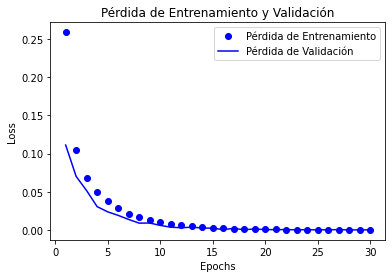

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

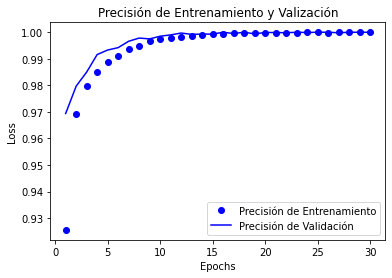

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 1.9494 - accuracy: 0.8510 - val_loss: 0.9530 - val_accuracy: 0.8893
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 0.9103 - accuracy: 0.8882 - val_loss: 0.8421 - val_accuracy: 0.8989
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 0.7858 - accuracy: 0.9104 - val_loss: 0.7257 - val_accuracy: 0.9253
Epoch 4/30
469/469 [==============================] - 7s 16ms/step - loss: 0.7126 - accuracy: 0.9236 - val_loss: 0.6446 - val_accuracy: 0.9390
Epoch 5/30
469/469 [==============================] - 7s 16ms/step - loss: 0.6661 - accuracy: 0.9321 - val_loss: 0.6339 - val_accuracy: 0.9406
Epoch 6/30
469/469 [==============================] - 7s 16ms/step - loss: 0.6343 - accuracy: 0.9362 - val_loss: 0.5855 - val_accuracy: 0.9488
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.6101 - accuracy: 0.9404 - val_loss: 0.6023 - val_accuracy: 0.9438

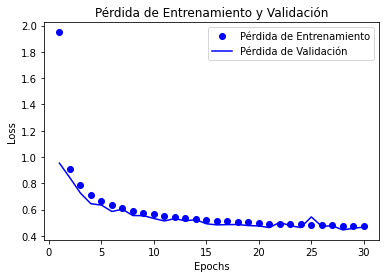

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

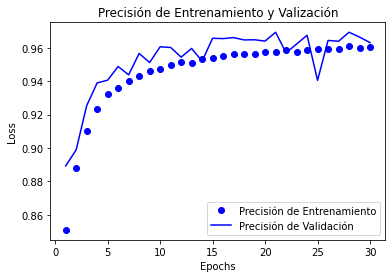

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
469/469 [==============================] - 34s 72ms/step - loss: 0.4856 - accuracy: 0.9188 - val_loss: 0.2658 - val_accuracy: 0.9586
Epoch 2/30
469/469 [==============================] - 9s 18ms/step - loss: 0.2417 - accuracy: 0.9577 - val_loss: 0.1833 - val_accuracy: 0.9726
Epoch 3/30
469/469 [==============================] - 8s 17ms/step - loss: 0.1973 - accuracy: 0.9649 - val_loss: 0.1536 - val_accuracy: 0.9778
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.1776 - accuracy: 0.9680 - val_loss: 0.1728 - val_accuracy: 0.9696
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1666 - accuracy: 0.9704 - val_loss: 0.1375 - val_accuracy: 0.9803
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1579 - accuracy: 0.9727 - val_loss: 0.1335 - val_accuracy: 0.9800
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1521 - accuracy: 0.9731 - val_loss: 0.1449 - val_accuracy: 0.974

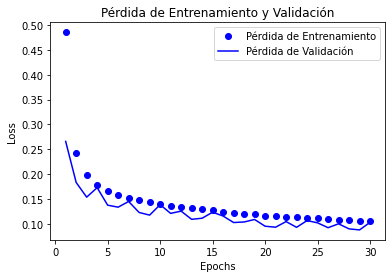

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

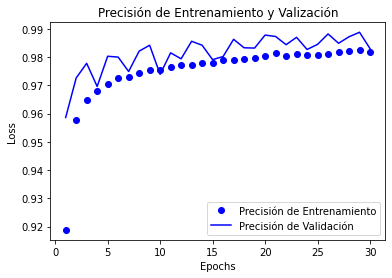

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 1.9767 - accuracy: 0.8474 - val_loss: 0.9983 - val_accuracy: 0.8834
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.9261 - accuracy: 0.8876 - val_loss: 0.8542 - val_accuracy: 0.8959
Epoch 3/30
469/469 [==============================] - 8s 17ms/step - loss: 0.8075 - accuracy: 0.9073 - val_loss: 0.7198 - val_accuracy: 0.9291
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.7386 - accuracy: 0.9191 - val_loss: 0.6968 - val_accuracy: 0.9272
Epoch 5/30
469/469 [==============================] - 8s 17ms/step - loss: 0.6895 - accuracy: 0.9283 - val_loss: 0.6327 - val_accuracy: 0.9455
Epoch 6/30
469/469 [==============================] - 8s 17ms/step - loss: 0.6531 - accuracy: 0.9338 - val_loss: 0.6100 - val_accuracy: 0.9460
Epoch 7/30
469/469 [==============================] - 8s 16ms/step - loss: 0.6266 - accuracy: 0.9387 - val_loss: 0.5947 - val_accuracy: 0.9504

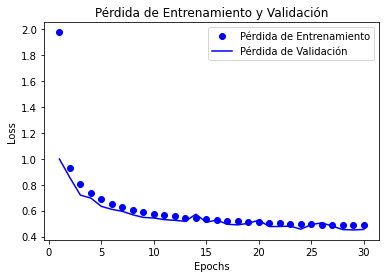

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

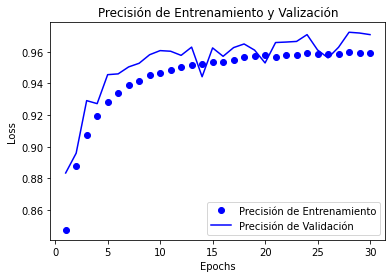

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 0.3139 - accuracy: 0.9079 - val_loss: 0.1221 - val_accuracy: 0.9659
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1522 - accuracy: 0.9547 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 3/30
469/469 [==============================] - 8s 18ms/step - loss: 0.1172 - accuracy: 0.9652 - val_loss: 0.0640 - val_accuracy: 0.9806
Epoch 4/30
469/469 [==============================] - 9s 19ms/step - loss: 0.0982 - accuracy: 0.9706 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0856 - accuracy: 0.9739 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 6/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0774 - accuracy: 0.9774 - val_loss: 0.0364 - val_accuracy: 0.9899
Epoch 7/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0728 - accuracy: 0.9789 - val_loss: 0.0337 - val_accuracy: 0.9905

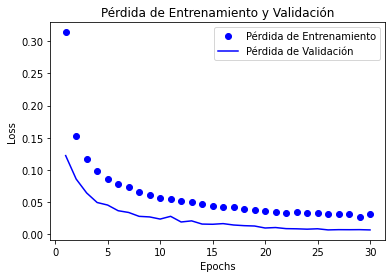

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

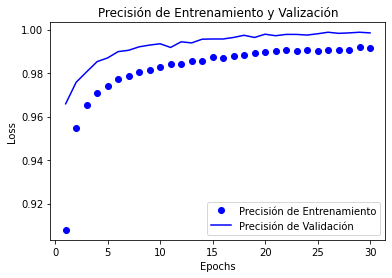

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

ERROR. No existe esa opción


### CONCLUSIONES

 - El caso 0 alcanza la perfección al predecir las imágenes (accuracy=100%).
 - El caso 1 tiene ligeramente menos perfección (accuracy=96%).
 - El caso 2 tiene más perfección (accuracy=98%).
 - El caso 3 es intermedio entre el caso 1 y 3 (accuracy=97%)
 - El caso 4 tiene accuracy casi 100%.
 Por tanto, ha funcionado mejor el dropout.